In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # to create model to predict 
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
df = pd.read_csv("crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df=df.drop(['humidity','rainfall'],axis=1)

In [6]:
df.head()

,N,P,K,temperature,ph,label
0,90,42,43,20.879744,6.502985,rice
1,85,58,41,21.770462,7.038096,rice
2,60,55,44,23.004459,7.840207,rice
3,74,35,40,26.491096,6.980401,rice
4,78,42,42,20.130175,7.628473,rice


In [7]:
# N=Nitogen
# P=phosphorus
# ph
# label=output


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   ph           2200 non-null   float64
 5   label        2200 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 103.3+ KB


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
ph             0
label          0
dtype: int64

In [9]:
df.describe()

,N,P,K,temperature,ph
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,6.469480
std,36.917334,32.985883,50.647931,5.063749,0.773938
min,0.000000,5.000000,5.000000,8.825675,3.504752
25%,21.000000,28.000000,20.000000,22.769375,5.971693
50%,37.000000,51.000000,32.000000,25.598693,6.425045
75%,84.250000,68.000000,49.000000,28.561654,6.923643
max,140.000000,145.000000,205.000000,43.675493,9.935091


In [10]:
numeric_c = df.select_dtypes(include=['number'])
correlation = numeric_c.corr()

In [11]:
print(correlation)

                    N         P         K  temperature        ph
N            1.000000 -0.231460 -0.140512     0.026504  0.096683
P           -0.231460  1.000000  0.736232    -0.127541 -0.138019
K           -0.140512  0.736232  1.000000    -0.160387 -0.169503
temperature  0.026504 -0.127541 -0.160387     1.000000 -0.017795
ph           0.096683 -0.138019 -0.169503    -0.017795  1.000000


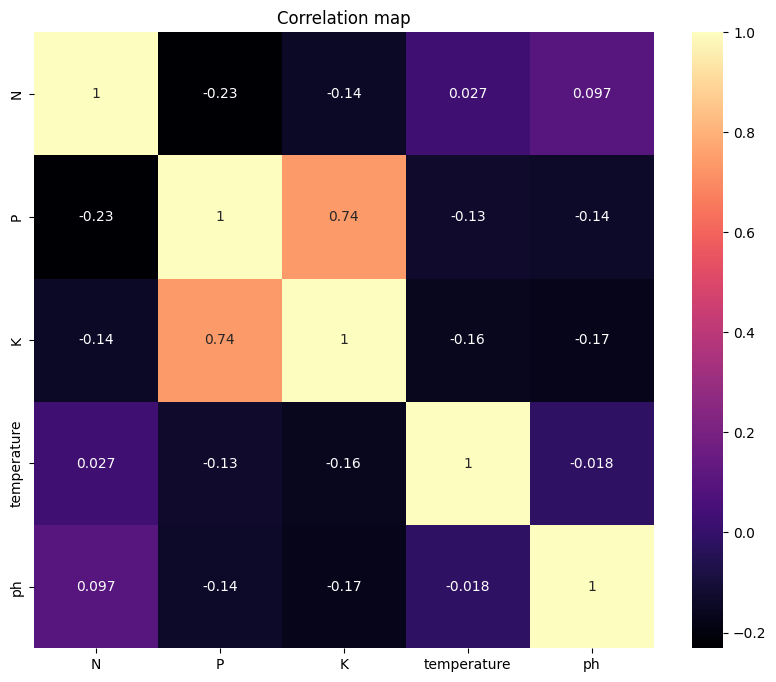

In [12]:
plt.figure(figsize=(10,8))  
sns.heatmap(correlation , annot=True , cmap='magma')
plt.title("Correlation map")
plt.show()

In [13]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\Users\Krishna Yadav\AppData\Local\Temp\ipykernel_14172\3441509706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['K'])


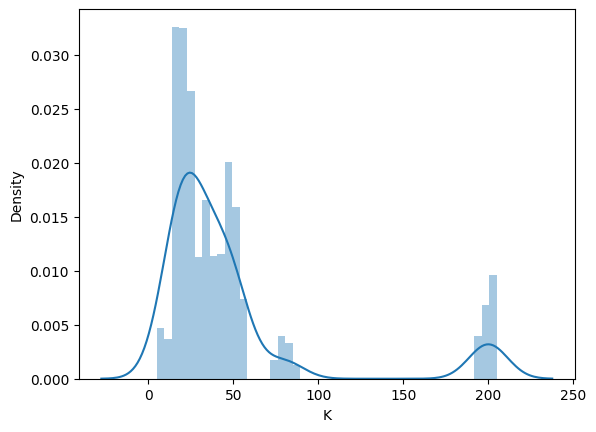

In [15]:
sns.distplot(df['K'])
plt.show()

In [16]:
#making dictionary making output value in numeric
crop_dic={
    'rice' : 1 ,
    'maize' : 2 ,
    'chickpea' : 3 ,
    'kidneybeans' : 4 ,
    'pigeonpeas' : 5 ,
    'mothbeans' : 6 ,
    'mungbean' : 7 ,
    'blackgram' : 8 ,
    'lentil' : 9 ,
    'pomegranate' : 10 ,
    'banana' : 11 , 
    'mango' : 12 , 
    'grapes' : 13 ,
    'watermelon' : 14 , 
    'muskmelon' : 15 ,
    'apple' : 16 ,
    'orange' : 17 ,
    'papaya' : 18 ,
    'coconut' : 19 , 
    'cotton' : 20 , 
    'jute' : 21 , 
    'coffee' : 22
}
# df['label']=df['label'].map(crop_dic)

In [17]:
# df.head()

In [18]:
# df['label']=df['label'].map(crop_dic)


In [19]:
unique_crops = df['label'].unique()
crop_dic = {name: i+1 for i, name in enumerate(unique_crops)}
df['label'] = df['label'].map(crop_dic)

In [20]:
df.head()

,N,P,K,temperature,ph,label
0,90,42,43,20.879744,6.502985,1
1,85,58,41,21.770462,7.038096,1
2,60,55,44,23.004459,7.840207,1
3,74,35,40,26.491096,6.980401,1
4,78,42,42,20.130175,7.628473,1


In [21]:
#for show numeric output
df.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [22]:
df.label.value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [23]:
# for tsting removing label 
X=df.drop(["label"], axis=1)
y=df["label"]

In [24]:
#show
X.head()

,N,P,K,temperature,ph
0,90,42,43,20.879744,6.502985
1,85,58,41,21.770462,7.038096
2,60,55,44,23.004459,7.840207
3,74,35,40,26.491096,6.980401
4,78,42,42,20.130175,7.628473


In [25]:
x_test,x_train,y_test,y_train = train_test_split(X , y , test_size=0.2 , random_state=42)

In [26]:
x_train.shape

(440, 5)

In [27]:
mx=MinMaxScaler()
x_train=mx.fit_transform(x_train)
x_test=mx.transform(x_test)

In [28]:
x_train

array([[0.72142857, 0.08571429, 0.2020202 , 0.58496683, 0.43357429],
       [0.7       , 0.02142857, 0.22222222, 0.48575674, 0.4456159 ],
       [0.42142857, 0.40714286, 0.21212121, 1.        , 0.55619767],
       ...,
       [0.86428571, 0.3       , 0.04545455, 0.40872408, 0.68292227],
       [0.82857143, 0.33571429, 0.06060606, 0.38888386, 0.42214144],
       [0.03571429, 0.45      , 0.06565657, 0.27218545, 0.42329901]])

In [29]:
st=StandardScaler()
#in standard scale first we have to fit and then transform and test should transfrom
st.fit(x_train)
X_train=st.transform(x_train)
X_test=st.transform(x_test)

In [30]:
# making ml model for recommdation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [31]:
# making dictionary of this  
models={
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()

}

In [32]:
#model predict

for name,model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    score=accuracy_score(y_test , ypred)
    print(f"{name} model with acccuracy :{score}")

LogisticRegression model with acccuracy :0.70625
KNeighborsClassifier model with acccuracy :0.7579545454545454
DecisionTreeClassifier model with acccuracy :0.8318181818181818
ExtraTreeClassifier model with acccuracy :0.6528409090909091
RandomForestClassifier model with acccuracy :0.8869318181818182
BaggingClassifier model with acccuracy :0.8568181818181818
GradientBoostingClassifier model with acccuracy :0.8448863636363636
AdaBoostClassifier model with acccuracy :0.15965909090909092


In [33]:
# GradientBoostingClassifier model with acccuracy :0.8448863636363636
# DecisionTreeClassifier model with acccuracy :0.8244318181818182
# RandomForestClassifier model with acccuracy :0.8795454545454545
# BaggingClassifier model with acccuracy :0.8607954545454546

In [34]:
#using randomforestclassifier for prediction because it gives 0.8789

ran = RandomForestClassifier()
ran.fit(X_train,y_train)
y_pred=ran.predict(X_test)
accuracy_score(y_test,y_pred)

0.8857954545454545

In [35]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'ph', 'label'], dtype='object')

In [36]:
def recommdation(N,P,K,temperature,ph):
    feature = np.array([N , P , K , temperature , ph]).reshape(1,-1)
    mx_feature = mx.fit_transform(feature)
    st_features = st.fit_transform(mx_feature)

    prediction = ran.predict(st_features).reshape(1 , -1)
    return prediction[0]    

In [37]:
df.head()

,N,P,K,temperature,ph,label
0,90,42,43,20.879744,6.502985,1
1,85,58,41,21.770462,7.038096,1
2,60,55,44,23.004459,7.840207,1
3,74,35,40,26.491096,6.980401,1
4,78,42,42,20.130175,7.628473,1


In [38]:
N = 90
P = 42
K = 43
temperature = 20.879744
ph =	6.502985		 

predict = recommdation(N , P , K , temperature , ph)
# model.predict(x.reshape(1, -1))

In [39]:
# predicted_crop_index = int(predict[0])  # Convert np.int64 to Python int
# predicted_crop = crop_dic[predicted_crop_index]
# print("Recommended Crop:", predicted_crop)

In [40]:
# predicted_crop_index = int(predict[0])
# print("Index predicted:", predicted_crop_index)

# # Check if the key exists
# if predicted_crop_index in crop_dic:
#     predicted_crop = crop_dic[predicted_crop_index]
# .


In [41]:
predict

array([18], dtype=int64)

In [ ]:
import pickle


with open("model.pkl", "wb") as file:
    pickle.dump(ran, file)


with open("minmaxscaler.pkl", "wb") as file:
    pickle.dump(mx, file)


with open("standscaler.pkl", "wb") as file:
    pickle.dump(st, file)
